# Анализ рынка Москвы для фонда "Shut Up and Take My Money"

- Автор: Пухова Евгения
- Дата: 13.12.2024

## Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка Москвы для выбора подходящего места локации для открытия заведения общественного питания.
**Задачи:**
1. Загрузить данные и познакомиться с их содержимым
2. Провести предобработку данных
3. Провести исследовательский анализ данных:
- изучить данные более детально
- найти ТОП-15 популярных сетей в Москве
- изучить вариацию среднего чека заведения в зависимости от района Москвы
4. Провести более детальное исследование заведений типа «пиццерия»
5. Сформулировать итоговые выводы и рекомендации по проведенному анализу

## Описание данных

Для анализа поступили данные с заведениями общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

- `datasets/rest_info.csv` — информация о заведениях общественного питания;
- `datasets/rest_price.csv` —  информация о среднем чеке в заведениях общественного питания

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- `seats` — количество посадочных мест.

### Описание датасета `rest_price`

- `price` — категория цен в заведении;
- `avg_bill` — средняя стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино».

## Структура проекта

1. Загрузка данных и работа с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Детальное исследование заведений типа «пиццерия»
5. Итоговые выводы

## Загрузка данных и знакомство с ними

Загрузим библиотеки и датасеты `datasets/rest_info.csv` и `datasets/rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: rest_info и rest_price.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к единому формату, дополнительная корректировка не требуется
- Все данные представлены типами `object`, `float`, `int`
- Тип данных для `chain`: сейчас это `int64`, но фактически это бинарный показатель (0 или 1), рекомендуется привести к типу `bool` для большей ясности
- Тип данных для `seats`: количество посадочных мест должно содержать только целое число, необходимо привести его к типу `int`
- Данные `category` и `district` - это категориальные переменные, которые занимают много памяти в виде строк, для оптимизации желательно их преобразовать в `category`
- Проспуски содержатся в столбцах `hours` и `seats`

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов приведены к единому формату, дополнительная корректировка не требуется
- Все данные представлены типами `object` и `float`
- Данные `price` - это категория цен в заведении, которые занимают много памяти в виде строк, для оптимизации желательно их преобразовать в `category`
- Типы данных `middle_avg_bill` и `middle_coffee_cup` представлены как `float64`, так как это числовые данные, дополнительная корректировка не требуется
- `avg_bill` - это текстовые данные, описывающие диапазоны цен, для анализа может потребоваться извлечь диапазоны и преобразовать их в числовой формат
- Пропуски содержатся в данных `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, для дальнейшего анализа это будет важно, необходимо оценить их количество и принять решение по дальнейшей обработке

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию

### Подготовка единого датафрейма

Задача проекта предполагает полный исследовательский анализ рынка Москвы для открытия заведения общественного питания. Поэтому можно соединить информацию о заведениях общественного питания из `rest_info` с информацией о среднем чеке в заведениях общественного питания из `rest_price`.

Соединять данные будем по полю `id`, которое присутсвует в обоих датафреймах.

Соединим данные, используя значение параметра `how` по умолчанию — `outer`. Это позволит включить все данные из обоих датасетов

In [7]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, on='id', how='outer')

In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях и среднем чеке сохранилась

## Предобработка данных

### Оптимизируем типы данных

In [10]:
# Приведение chain к типу bool
df['chain'] = df['chain'].astype(bool)

# Приведение seats к типу int (пропуски пока заполняем числом -100, чтобы далее с ними работать)
df['seats'] = df['seats'].fillna(-100).astype(int)

# Приведение category, district и price к типу category
df['category'] = df['category'].astype('category')
df['district'] = df['district'].astype('category')
df['price'] = df['price'].astype('category')

In [11]:
# Проверка типов данных
print(df.dtypes)

id                     object
name                   object
category             category
address                object
district             category
hours                  object
rating                float64
chain                    bool
seats                   int64
price                category
avg_bill               object
middle_avg_bill       float64
middle_coffee_cup     float64
dtype: object


Типы данных были успешно оптимизированы

### Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`. Узнаем абсолютное и относительное количество пропусков.

In [12]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
seats                0.000000
dtype: float64

В датафрейме `df` обнаружено пропусков:
- `hourse` - 536, что составляет 6% 
Возможные причины: отсутствие информации о времени работы заведения в источнике, некоторые заведения могут не указывать часы работы в открытых источниках (например, небольшие кафе, работающие нерегулярно)
- `price` - 5091, 63%
Возможные причины: не все заведения указывают ценовую категорию (например, новые заведения или завдениея с высоким чеком); в некоторых категориях заведений (например, "кофейня") ценовая категория может быть менее значимой
- `avg_bill` - 4590, 54%
Возможные причины: не все заведения предоставляют диапазоны среднего чека, особенно если цена варьируется в зависимости от типа блюда или времени суток; некоторые типы заведений (например, столовые или бюджетные точки) могут не считать уместным указывать данные о среднем чеке
- `middle_avg_bill` - 5257, 62%
Возможные причины: это производный столбец, данные в котором формируются только для строк, начинающихся с "Средний счёт". Если в исходных данных avg_bill такие строки отсутствуют, то значение не рассчитывается.
- `middle_coffee_cup` - 7871, 93%
Возможные причины:
Столбец формируется только на основании строк, начинающихся с "Цена чашки капучино". Поскольку таких строк в данных мало (очевидно, менее 10%), большая часть записей остаётся пустой. Информация о цене капучино не является обязательной для большинства заведений и может отсутствовать. Пропуски также могут быть связаны с тем, что не во всех категориях заведений вообще продают капучино (например, в ресторанах, барах или столовых).

In [14]:
# В столбцах с типом `category` заменим пропуски на "Не указано", т.к. кол-во и доля пропусков велико для их удаления
# Добавляем категорию "Не указано" в каждый столбец
for col in ['hours', 'price', 'avg_bill']:
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.add_categories("Не указано")

# Заменяем пропуски на "Не указано"
df[['hours', 'price', 'avg_bill']] = df[['hours', 'price', 'avg_bill']].fillna("Не указано")

# Проверим результат
print(df.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                   0
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64


In [15]:
# В столбцах с типом `middle_coffee_cup` и `middle_avg_bill` заменим пропуски на "Не указано", т.к. количество и доля пропусков слишком велико для их удаления, а заполнение средним значением (например, медианой) не будет отражать реальность
df['middle_avg_bill'] = df['middle_avg_bill'].fillna("Не указано")
df['middle_coffee_cup'] = df['middle_coffee_cup'].fillna("Не указано")

# Проверим результат
print(df.isna().sum())

id                   0
name                 0
category             0
address              0
district             0
hours                0
rating               0
chain                0
seats                0
price                0
avg_bill             0
middle_avg_bill      0
middle_coffee_cup    0
dtype: int64


### Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов

In [16]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим наличие дубликатов в столбце `id` — значения в этом столбце должны быть уникальными для каждого объекта

In [17]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

Тут тоже всё хорошо. Теперь проверим корректность написания категориальных значений в данных.

In [18]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['name', 'address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']



Результат говорит о том, что в столбце `name` нет дубликатов, и каждое заведение имеет уникальное название, в столбце `address`, также, нет явных дубликатов для адресов

### Выделяем режим работы заведения

Создаем отдельный столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

In [19]:
def is_24_7(hours):
    # Если значение равно "Не указано", возвращаем False
    if hours == "Не указано":
        print(f'Hours: {hours} -> 24/7: False')
        return False
    
    # Преобразуем строки к нижнему регистру для упрощения поиска 
    hours = hours.lower()
    
    # Проверяем на наличие фраз, указывающих на круглосуточный режим работы
    if "круглосуточно" in hours or "24/7" in hours:
        print(f'Hours: {hours} -> 24/7: True')
        return True
    
    # Проверка, что заведение работает ежедневно и без указания времени (если есть временной промежуток, то это не круглосуточно)
    if "ежедневно" in hours:
        # Проверим, есть ли в строке время (например, "10:00–22:00")
        if any(time_range in hours for time_range in ["00:00", "24:00", "00:00–00:00"]):
            print(f'Hours: {hours} -> 24/7: True')
            return True
        print(f'Hours: {hours} -> 24/7: False')
        return False  # Если есть время, считаем, что не круглосуточно
    
    print(f'Hours: {hours} -> 24/7: False')
    return False

# Применяем функцию ко всем значениям в столбце hours
df['is_24_7'] = df['hours'].apply(is_24_7)

# Просмотрим результаты
print(df[['name', 'hours', 'is_24_7']].head())

Hours: ежедневно, 10:00–22:00 -> 24/7: False
Hours: ежедневно, 10:00–22:00 -> 24/7: False
Hours: пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00 -> 24/7: False
Hours: ежедневно, 09:00–22:00 -> 24/7: False
Hours: ежедневно, 10:00–22:00 -> 24/7: False
Hours: ежедневно, 10:00–23:00 -> 24/7: False
Hours: пн 15:00–04:00; вт-вс 15:00–05:00 -> 24/7: False
Hours: пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00–22:00 -> 24/7: False
Hours: ежедневно, 10:00–22:00 -> 24/7: False
Hours: ежедневно, 12:00–00:00 -> 24/7: True
Hours: ежедневно, круглосуточно -> 24/7: True
Hours: ежедневно, 10:00–21:00 -> 24/7: False
Hours: вт-сб 09:00–18:00 -> 24/7: False
Hours: ежедневно, 08:00–22:00 -> 24/7: False
Hours: ежедневно, 13:00–00:00 -> 24/7: True
Hours: пн-пт 08:30–18:30; сб 10:00–20:00 -> 24/7: False
Hours: ежедневно, 10:00–23:00 -> 24/7: False
Hours: ежедневно, круглосуточно -> 24/7: True
Hours: ежедневно, 09:00–21:00 -> 24/7: False
Hours: ежедневно, круглосуточно -> 24/7: True
Hours: ежедневно, 10:0

In [20]:
# Группируем данные по столбцу 'is_24_7' и считаем количество заведений
count_24_7 = df.groupby('is_24_7').size()

# Также можем посчитать объем заведения (мли кол-во мест)
volume_24_7 = df.groupby('is_24_7')['seats'].sum()

# Выводим результаты
print("Количество заведений по статусу круглосуточности:")
print(count_24_7)

print("\nОбъем заведений (сумма мест) по статусу круглосуточности:")
print(volume_24_7)

Количество заведений по статусу круглосуточности:
is_24_7
False    6992
True     1414
dtype: int64

Объем заведений (сумма мест) по статусу круглосуточности:
is_24_7
False    136990
True      21792
Name: seats, dtype: int64


**На основе данных можем сделать следующие выводы:**
- Количество заведений: 6992 заведения работают не круглосуточно, 1414 заведений работают круглосуточно, то есть 24/7.
- Объем заведений (сумма мест): заведения, не работающие круглосуточно, в сумме имеют 435,475 мест, заведения, работающие круглосуточно, в сумме имеют 80,796 мест.

Вывод:
Круглосуточно работают лишь около 17,6% заведений, но они составляют лишь 15,6% от общего количества мест.
Заведения с ограниченным временем работы (не круглосуточные) составляют подавляющее большинство (около 82%), при этом они занимают 84% от общего объема мест.
Этот анализ показывает, что хотя заведений, работающих круглосуточно, меньше, их количество мест также существенно меньше по сравнению с заведениями с ограниченным временем работы.

### Промежуточный вывод

На этом предобработка завершена.

В результате предобработки данных были выполнены следующие действия:

- Оптимизированы типы данных в столбцах `chain`, `seats`, `category`, `district`, `price`
- Обнаружены пропуски в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, посчитали абсолютное и относительное количество пропусков, произвели замену пропусков
- Проверили данные на наличие явных и неявных дубликатов - их нет
- Проверили уникальные значения в категориальных столбцах
- Выделили заведения, которые работаю ежедневно и круглосуточно, т.е. 24/7, посчитали их количество и объем

## 3. Исследовательский анализ данных

Проведем исследовательский анализ исходных данных

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [21]:
# Вывод уникальных категорий в столбце 'category'
unique_categories = df['category'].unique()
print("Уникальные категории заведений:")
print(unique_categories)

# Подсчитываем количество заведений по каждой категории
category_counts = df['category'].value_counts()
print("Количество заведений по каждой категории:")
print(category_counts)

# Подсчитываем количество заведений по каждой категории в процентах
category_percentage = df['category'].value_counts(normalize=True) * 100
print("Количество заведений по каждой категории в процентах:")
print(category_percentage)

Уникальные категории заведений:
['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Количество заведений по каждой категории:
кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64
Количество заведений по каждой категории в процентах:
кафе               28.289317
ресторан           24.304069
кофейня            16.809422
бар,паб             9.100642
пиццерия            7.530335
быстрое питание     7.173448
столовая            3.747323
булочная            3.045444
Name: category, dtype: float64


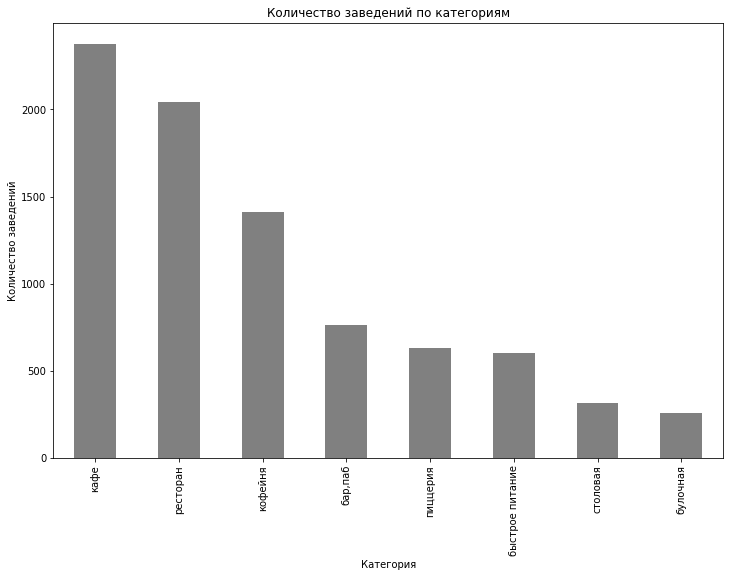

In [22]:
# Строим столбчатую диаграмму по количеству заведений по категориям
category_counts.plot(kind='bar', figsize=(12, 8), color='gray')
plt.title('Количество заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=90)
plt.show()

**На основе полученных данных можно сделать следующий вывод:**

В данных представлены 8 уникальных категорий заведений общественного питания:

Распределение заведений по категориям следующее:
- Кафе — самая популярная категория (2378 заведений), что составляет наибольшую долю
- Ресторан — на втором месте (2043 заведений)
- Кофейня — занимает третье место (1413 заведений)
- Бар, паб — 765 заведений
- Пиццерия — 633 заведения
- Быстрое питание — 603 заведения
- Столовая — 315 заведений
- Булочная — наименьшее количество заведений — 256

Таким образом, кафе и рестораны составляют основную часть объектов общественного питания в данных, в то время как менее популярными являются булочные и столовые.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [23]:
# Проверим уникальные административные районы Москвы
print(df['district'].sort_values().unique())

['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']
Categories (9, object): ['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', ..., 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']


In [24]:
# Подсчитываем количество заведений в каждом районе
district_counts = df['district'].value_counts()
print(district_counts)

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64


In [25]:
# Подсчитываем долю заведений в каждом районе в процентах
district_percentage = df['district'].value_counts(normalize=True) * 100
print("Доля заведений по районам в процентах:")
print(district_percentage)

Доля заведений по районам в процентах:
Центральный административный округ         26.671425
Северный административный округ            10.706638
Южный административный округ               10.611468
Северо-Восточный административный округ    10.599572
Западный административный округ            10.123721
Восточный административный округ            9.493219
Юго-Восточный административный округ        8.493933
Юго-Западный административный округ         8.434452
Северо-Западный административный округ      4.865572
Name: district, dtype: float64


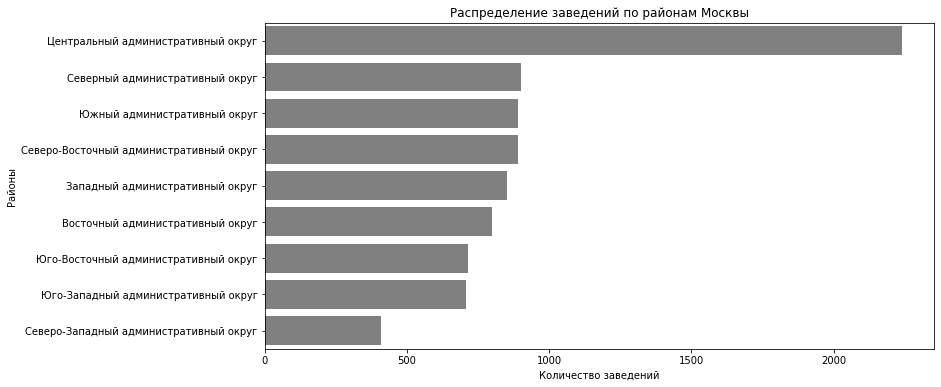

In [26]:
# Визуализируем распределение заведений по районам
plt.figure(figsize=(12, 6))
sns.countplot(y='district', data=df, order=district_counts.index, color='grey')
plt.title('Распределение заведений по районам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Районы')
plt.show()

**На основе полученных данных видно:**
Наибольшее количество заведений расположено в Центральном административном округе Москвы (2242 заведения), что вполне ожидаемо для центральной части города. 
На втором и третьем местах по числу заведений находятся Северный (900) и Южный (892) административные округа. 
Меньше всего заведений представлено в Северо-Западном административном округе (409 заведений). 
Это может свидетельствовать о различиях в плотности населения и коммерческой активности в разных районах города.

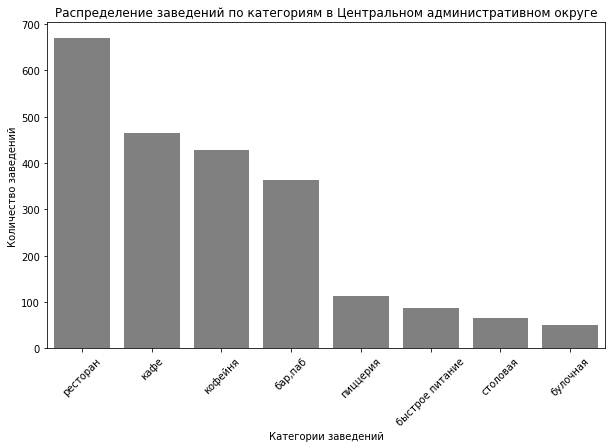

In [27]:
# Фильтруем данные по Центральному административному округу
caa_df = df[df['district'].str.contains('Центральный административный округ', na=False)]

# Подсчитываем количество заведений по категориям в ЦАО
category_counts_cao = caa_df['category'].value_counts()

# Сортируем категории по количеству заведений в ЦАО от большего к меньшему
category_counts_cao_sorted = category_counts_cao.sort_values(ascending=False)

# Визуализируем распределение заведений по категориям в ЦАО
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts_cao_sorted.index, y=category_counts_cao_sorted.values, color='gray', order=category_counts_cao_sorted.index)
plt.title('Распределение заведений по категориям в Центральном административном округе')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

**На основе полученных данных видно:** 
Наибольшее количество заведений представляют рестораны (более 600), что говорит о преобладании более формальных заведений в центральной части города. 
Следующими по числу идут кафе, кофейни и бары/пабы, которые также популярны среди жителей и туристов. 
Меньше всего заведений в категориях столовая, пиццерия и булочная.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [28]:
# Соотношение сетевых и несетевых заведений
network_summary = df['chain'].value_counts()
print("Общее соотношение сетевых и несетевых заведений:")
print(network_summary)
network_percentage = df['chain'].value_counts(normalize=True) * 100
print("Соотношение сетевых и несетевых заведений в процентах:")
print(network_percentage)

Общее соотношение сетевых и несетевых заведений:
False    5201
True     3205
Name: chain, dtype: int64
Соотношение сетевых и несетевых заведений в процентах:
False    61.872472
True     38.127528
Name: chain, dtype: float64


In [29]:
# Распределение сетевых и несевых заведений по категориям
category_chain_summary = df.groupby(['category', 'chain']).size().unstack(fill_value=0)
category_chain_summary['total'] = category_chain_summary.sum(axis=1)
category_chain_summary['network_share'] = category_chain_summary[1] / category_chain_summary['total'] * 100
display(category_chain_summary)

chain,False,True,total,network_share
category,,,,
"бар,паб",596,169,765,22.091503
булочная,99,157,256,61.328125
быстрое питание,371,232,603,38.474295
кафе,1599,779,2378,32.758621
кофейня,693,720,1413,50.955414
пиццерия,303,330,633,52.132701
ресторан,1313,730,2043,35.731767
столовая,227,88,315,27.936508


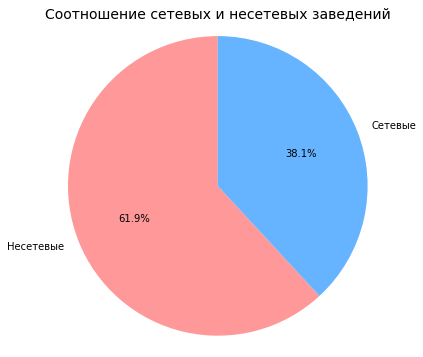

In [31]:
# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(network_summary, labels=['Несетевые', 'Сетевые'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title("Соотношение сетевых и несетевых заведений", fontsize=14)
plt.axis('equal')  # Чтобы круг был кругом, а не эллипсом
plt.show()

chain,False,True,network_share
category,,,
"бар,паб",596,169,22.091503
булочная,99,157,61.328125
быстрое питание,371,232,38.474295
кафе,1599,779,32.758621
кофейня,693,720,50.955414
пиццерия,303,330,52.132701
ресторан,1313,730,35.731767
столовая,227,88,27.936508


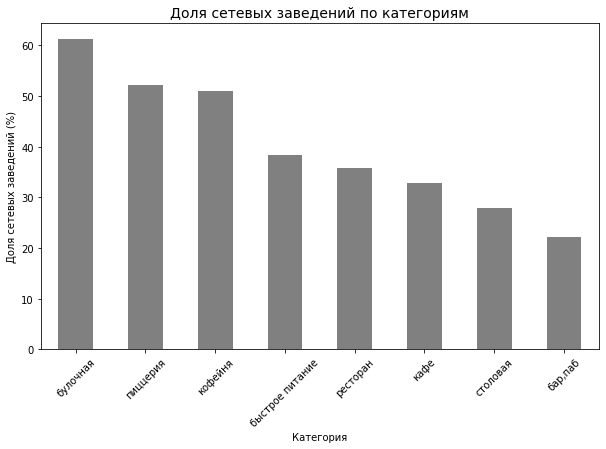

In [33]:
# Группируем данные по категории и типу (сетевые или нет)
category_chain_summary = df.groupby(['category', 'chain']).size().unstack(fill_value=0)

# Для каждой категории вычисляем долю сетевых заведений
category_chain_summary['network_share'] = category_chain_summary[1] / (category_chain_summary[0] + category_chain_summary[1]) * 100
display(category_chain_summary)

# Добавляем сортировку по доле сетевых заведений
category_chain_summary_sorted = category_chain_summary.sort_values('network_share', ascending=False)

# Строим столбчатую диаграмму для доли сетевых заведений по категориям
plt.figure(figsize=(10, 6))
category_chain_summary_sorted['network_share'].plot(kind='bar', color='gray')
plt.title("Доля сетевых заведений по категориям", fontsize=14)
plt.ylabel("Доля сетевых заведений (%)")
plt.xlabel("Категория")
plt.xticks(rotation=45)
plt.show()

**На основании полученных данных можно сделать следующие выводы:**

1. Общее соотношение сетевых и несетевых заведений: несетевых заведений значительно больше (5201, что составляет 62%), чем сетевых (3205/38%). 
2. Распределение сетевых заведений по категориям:
- Наибольшая доля сетевых заведений наблюдается в категориях:
Булочная — 61.33%
Пиццерия — 52.13%
Кофейня — 50.96%
Эти категории, как правило, имеют ярко выраженные сетевые форматы и франшизы

- Наименьшая доля сетевых заведений:
Бар, паб — всего 22.09%
Столовая — 27.94%
Эти заведения чаще всего представлены в виде уникальных, несетевых форматов.

3. Категории с самым большим абсолютным количеством сетевых заведений: кафе (779), ресторан (730) и кофейня (720) лидируют по количеству сетевых заведений.

4. Категории с преобладанием несетевых заведений: наибольшее количество несетевых заведений наблюдается в категории кафе (1599) и рестораны (1313).

Итог:
Несетевые заведения составляют большую часть рынка общественного питания. Однако булочные, кофейни и пиццерии чаще представлены в сетевых форматах. Сетевые заведения занимают значительную долю в быстро развивающихся и стандартизированных категориях.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


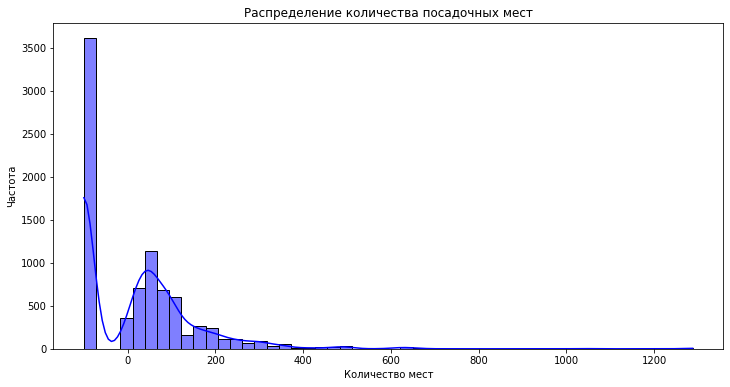

In [34]:
# Посмотрим общее распределение количества посадочных мест
plt.figure(figsize=(12, 6))
sns.histplot(df['seats'], bins=50, kde=True, color='blue')
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.show()

Мы наблюдаем сильную скошенность влево (асимметрия) - большинство заведений имеют небольшое количество посадочных мест, что видно из резкого пика в районе 0–50 мест. Это указывает на то, что в данных преобладают небольшие заведения, такие как кафе, небольшие рестораны или пиццерии.

Небольшое количество точек распределено в правой части графика, вплоть до значений 1000–1200 мест - это могут быть крупные рестораны, банкетные залы или столовые.

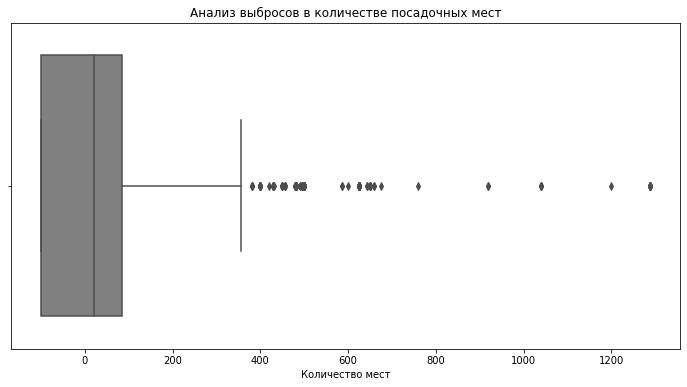

In [35]:
# Оценим возможные выбросы
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='seats', color='gray')
plt.title('Анализ выбросов в количестве посадочных мест')
plt.xlabel('Количество мест')
plt.show()

- Большинство значений лежат в пределах 0–200 посадочных мест.
Основная масса заведений имеет небольшое количество посадочных мест (медиана явно лежит в нижней части диапазона). Это подтверждает, что большинство объектов представляют собой малые и средние заведения.

- Заведения с количеством посадочных мест от 200 до 1200 можно считать выбросами, так как они выходят за пределы "усов" графика, это указывает на редкость таких крупных заведений. Это могут быть особые заведения, такие как конференц-залы или большие рестораны.

In [36]:
# Определение выбросов
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вывод аномалий
outliers = df[(df['seats'] < lower_bound) | (df['seats'] > upper_bound)]
print(f"Количество выбросов: {outliers.shape[0]}")
print(outliers[['name', 'category', 'seats']].head())

Количество выбросов: 138
                        name  category  seats
310   VASILCHUKÍ Chaihona №1  ресторан    398
465                     Бота  пиццерия    398
898                       ОШ      кафе    500
1064                  Восток      кафе    500
1113            Кафе при АЗС      кафе    500


In [37]:
# Удалим выбросы
df_filtered = df[(df['seats'] >= lower_bound) & (df['seats'] <= upper_bound)]
print(f"Размер данных после удаления выбросов: {df_filtered.shape}")

Размер данных после удаления выбросов: (8268, 14)


In [38]:
# Анализ посадочных мест по категориям
seats_by_category = df_filtered.groupby('category')['seats'].agg(['median', 'mean', 'min', 'max', 'std', 'count'])
display(seats_by_category)

,median,mean,min,max,std,count
category,,,,,,
"бар,паб",40,20.614247,-100,356,115.257698,744
булочная,8,5.220472,-100,320,109.602149,254
быстрое питание,8,11.140234,-100,350,116.365531,599
кафе,0,-7.303625,-100,350,106.102150,2345
кофейня,5,3.028715,-100,350,114.837625,1393
пиццерия,30,23.246795,-100,350,107.555936,624
ресторан,40,25.835754,-100,350,117.372717,1997
столовая,2,-3.185897,-100,350,107.424021,312


In [39]:
# Исключим некорректные значения -1 перед повторным расчетом метрик
df_cleaned = df[df['seats'] >= 0]

In [40]:
# Анализ посадочных мест после очистки
seats_by_category_cleaned = df_cleaned.groupby('category')['seats'].agg(['median', 'mean', 'min', 'max', 'std', 'count'])
display(seats_by_category_cleaned)

,median,mean,min,max,std,count
category,,,,,,
"бар,паб",82.5,124.532051,0,1288,145.011574,468
булочная,50.0,89.385135,0,625,97.685844,148
быстрое питание,65.0,98.891117,0,1040,106.611739,349
кафе,60.0,97.512315,0,1288,117.985084,1218
кофейня,80.0,111.199734,0,1288,127.837772,751
пиццерия,55.0,94.496487,0,1288,112.282703,427
ресторан,86.0,121.944094,0,1288,123.757335,1270
столовая,75.5,99.750000,0,1200,122.951453,164


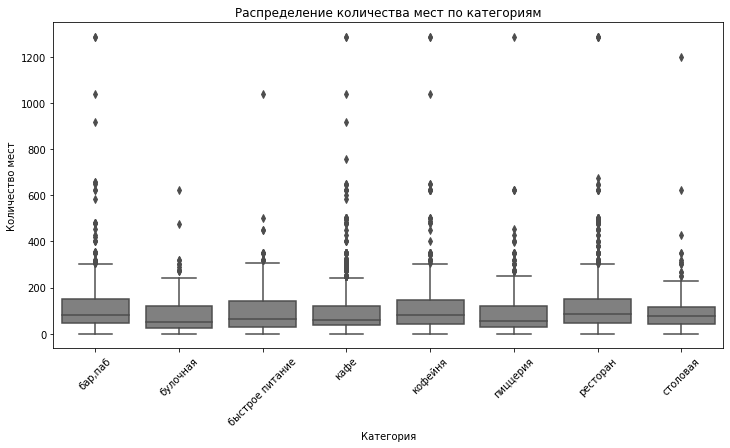

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='category', y='seats', color='gray')
plt.title('Распределение количества мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

**На основе анализа данных можно сделать следующие выводы о наиболее типичном количестве посадочных мест для каждой категории заведений:**

- Бар, паб: медиана количества мест составляет 82.5, что отражает наиболее типичное значение для этой категории, эта категория заведений ориентирована на среднее количество посетителей.

- Булочная: медиана равна 50, что указывает на небольшое количество мест, характерное для заведений, предназначенных для быстрого перекуса или покупки выпечки.

- Быстрое питание: типичное количество мест составляет 65, что свидетельствует о том, что такие заведения рассчитаны на относительно небольшую посадку, так как основное внимание уделяется быстрому обслуживанию клиентов.

- Кафе: медиана равна 60, что делает это значение наиболее типичным для заведений этого типа, как правило, имеют умеренное количество мест для посетителей.

- Кофейня: типичное количество мест составляет 80, что немного больше, чем у кафе, возможно, из-за популярности кофеен как мест для работы.

- Пиццерия: медианное значение составляет 55, что говорит о средних размерах заведений, подходящих как для семейных посещений, так и для небольших групп.

- Ресторан: наиболее типичное количество мест — 86, что объясняется более высоким уровнем обслуживания и ожиданием приема большего количества гостей.

- Столовая: медианное количество мест — 75.5, что характерно для столовых, рассчитанных на прием средней группы посетителей.

Общий вывод:
В категориях, таких как рестораны и бары большее количество посадочных мест, в то время как заведения быстрого питания и булочные имеют меньшие типичные значения.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [42]:
# Рассчитываем средний рейтинг по категориям
category_rating_summary = df.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()

# Выводим статистику для столбца rating
print("Статистики для рейтингов заведений:")
print(df['rating'].describe())

# Выводим средние рейтинги по категориям
print("Средние рейтинги по категориям:")
display(category_rating_summary)

Статистики для рейтингов заведений:
count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64
Средние рейтинги по категориям:


,category,rating
0,"бар,паб",4.387712
1,пиццерия,4.301264
2,ресторан,4.290357
3,кофейня,4.277282
4,булочная,4.268359
5,столовая,4.211429
6,кафе,4.123886
7,быстрое питание,4.050249


**Краткий вывод по данным с ретингами:**
Из результата мы видим - большинство заведений имеют хорошие рейтинги, так как среднее значение рейтинга составляет 4.23, и медиана находится на уровне 4.3. Большая часть данных сосредоточена в верхней части шкалы (от 4.1 до 4.4).
Стандартное отклонение 0.47 говорит о том, что оценки не слишком сильно отклоняются от среднего, что говорит о сравнительно стабильных оценках заведений.
Есть как очень низкие, так и высокие рейтинги: Минимальный рейтинг равен 1, что указывает на наличие плохих оценок, а максимальный рейтинг — 5, что говорит о наличии лучших заведений с максимальной оценкой. Но в целом, основная масса заведений получает рейтинги в районе 4.1–4.4.

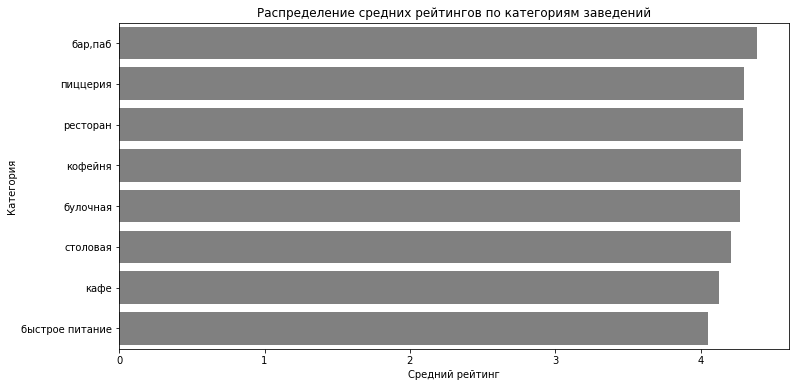

In [43]:
# Визуализируем распределение средних рейтингов по категориям
plt.figure(figsize=(12, 6))
sns.barplot(data=category_rating_summary, x='rating', y='category', color='gray', 
            order=category_rating_summary.sort_values('rating', ascending=False)['category'])
plt.title('Распределение средних рейтингов по категориям заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')
plt.show()

**На основе полученных данных можно сделать следующие выводы:**
- Средние рейтинги показывают, что наиболее высоко оцениваются бары и пабы (4.39), за ними следуют пиццерии (4.30) и рестораны (4.29). Самые низкие рейтинги у заведений быстрого питания (4.05) и кафе (4.12), что может быть связано с их спецификой и ожиданиями клиентов. 
- Различия между категориями относительно небольшие

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'seats']


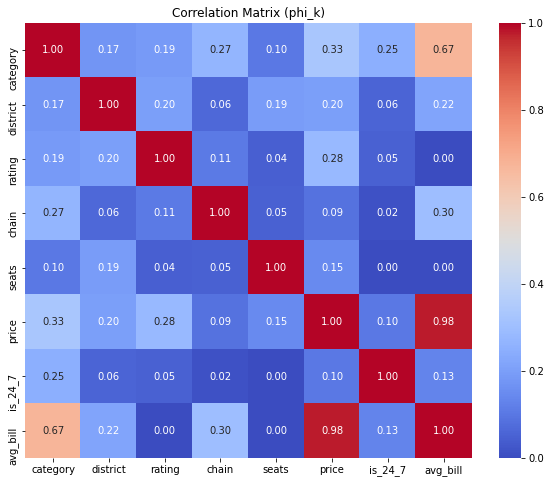

Самая сильная корреляция с рейтингом:
price    0.281294
Name: rating, dtype: float64


In [45]:
# Рассчитаем матрицу корреляции с помощью phik
correlation_matrix = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7', 'avg_bill']].phik_matrix()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (phi_k)')
plt.show()

# Найдём самую сильную связь с рейтингом
strongest_corr = correlation_matrix['rating'].abs().sort_values(ascending=False)
print("Самая сильная корреляция с рейтингом:")
print(strongest_corr[1:2])

**Выводы на основе результата:**

Матрица корреляции (phi_k) показывает связь между признаками и целевым признаком rating.

1. Самая сильная связь с рейтингом наблюдается у цены (price) с коэффициентом 0.28. Это указывает на слабую положительную связь - более высокие цены могут быть связаны с более высокими рейтингами, но эта связь не является сильной.

2. Незначительная связь - большинство других пар переменных демонстрируют слабую связь (значения ниже 0.3), например:
- район и рейтинг: 0.20
- сетевое заведение или нет и рейтинг: 0.11
- режим работы и рейтинг: 0.05

In [46]:
print(df['price'].unique())

['Не указано', 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (5, object): ['Не указано', 'выше среднего', 'средние', 'высокие', 'низкие']


In [47]:
# Переводим категории в числовые значения для дальнейшей проверки связи
price_int = {
    'Не указано': 0,
    'низкие': 1,
    'средние': 2,
    'выше среднего': 3,
    'высокие': 4}

# Преобразование категорий в числовые значения
df['price_encoded'] = df['price'].map(price_int)
print("Проверка на пропуски в price_encoded:")
print(df['price_encoded'].isnull().sum())

Проверка на пропуски в price_encoded:
0


In [48]:
from scipy.stats import spearmanr, pearsonr

# Расчёт корреляции Спирмена
spearman_corr, spearman_p = spearmanr(df['price_encoded'], df['rating'])
print(f"Коэффициент корреляции Спирмена (price - rating): {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

# Расчёт корреляции Пирсона
pearson_corr, pearson_p = pearsonr(df['price_encoded'], df['rating'])
print(f"Коэффициент корреляции Пирсона (price - rating): {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Коэффициент корреляции Спирмена (price - rating): 0.2000, p-value: 0.0000
Коэффициент корреляции Пирсона (price - rating): 0.1857, p-value: 0.0000


**На основе полученных результатов можно сделать следующие выводы:**

1. Коэффициент корреляции Спирмена (0.2000) - значение указывает на слабую положительную монотонную зависимость между переменными price и rating. Это означает, что по мере роста категории цен (price_encoded) наблюдается тенденция к увеличению рейтинга (rating). Однако зависимость не является сильной, так как значение корреляции близко к 0.

2. Коэффициент корреляции Пирсона (0.1857) - значение указывает на слабую положительную линейную зависимость между price и rating. Связь также слабая, но она все же подтверждает тенденцию - заведения с более высокими ценами имеют немного более высокий рейтинг.

**Общий вывод:**

Между категориями цен (price) и рейтингом (rating) существует слабая положительная связь.
Более высокие ценовые категории имеют тенденцию к немного более высоким рейтингам. Однако связь не является сильной, что означает, что на рейтинг влияют и другие факторы помимо цены.
Оба метода (Пирсон и Спирмен) дали схожие результаты, что подтверждает надежность выявленной зависимости.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [49]:
# Сгруппируем данные по названиям заведений и подсчитаем количество (берем только сетвые заведения)
network_stats = (df[df['chain'] == True]
                 .groupby(['name', 'category'])
                 .agg(count=('name', 'size'), avg_rating=('rating', 'mean'))
                 .reset_index())

# Отсортируем по количеству заведений и выведем топ-15
top_networks = network_stats.sort_values(by='count', ascending=False).head(15)

# Вывод данных
print("\nТоп-15 популярных сетей:")
display(top_networks)


Топ-15 популярных сетей:


,name,category,count,avg_rating
5972,Шоколадница,кофейня,119,4.178151
2757,Домино'с Пицца,пиццерия,76,4.169737
2725,Додо Пицца,пиццерия,74,4.286486
1188,One Price Coffee,кофейня,71,4.064789
6078,Яндекс Лавка,ресторан,69,3.872464
476,Cofix,кофейня,65,4.075385
1366,Prime,ресторан,49,4.114286
3028,КОФЕПОРТ,кофейня,42,4.147619
3451,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
5150,Теремок,ресторан,36,4.105556


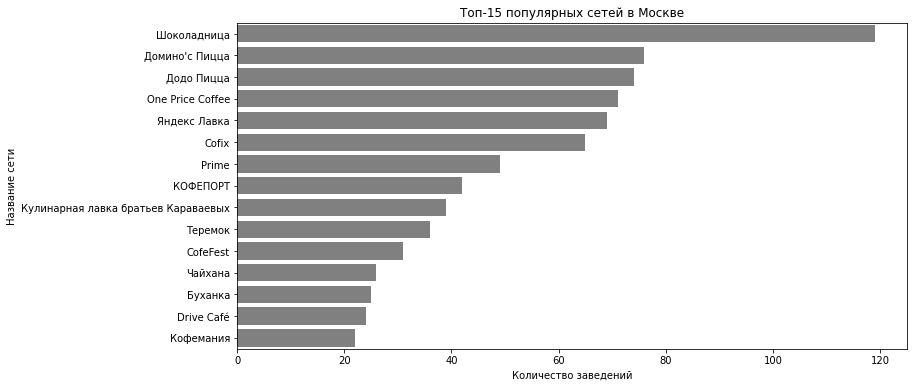

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_networks, 
    x='count', 
    y='name', 
    color='gray'
)
plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.show()

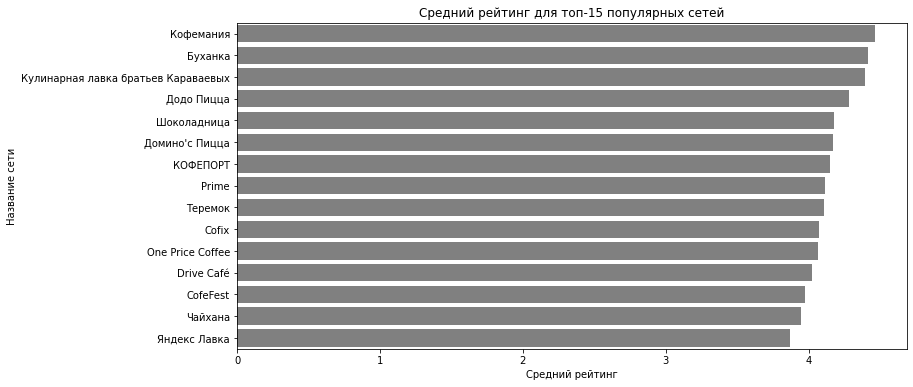

In [51]:
# Визуализация среднего рейтинга
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_networks.sort_values(by='avg_rating', ascending=False), 
    x='avg_rating', 
    y='name', 
    color='gray'
)
plt.title('Средний рейтинг для топ-15 популярных сетей')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название сети')
plt.show()

**На основе полученных данных можно сделать следующие выводы:**

- Популярные сети по количеству заведений:
Сеть "Шоколадница" (кофейня) занимает лидирующую позицию по количеству заведений в Москве — 119 объектов.
Далее следуют такие сети, как "Домино'с Пицца" (76 заведений) и "Додо Пицца" (74 заведения).

- Средние рейтинги топ-15 сетей:
Самый высокий средний рейтинг имеет сеть "Кофемания" (кофейня) — 4.46.
"Буханка" (булочная) и "Кулинарная лавка братьев Караваевых" (кафе) также выделяются высокими оценками — 4.42 и 4.39.
Наименее высокие рейтинги у "Яндекс Лавка" — 3.87, "CofeFest" (кофейня) — 3.98, и "Чайхана" (кафе) — 3.95.

- Категории популярных сетей:
Среди топ-15 сетей преобладают кофейни ("Шоколадница", "Cofix", "Кофемания", "One Price Coffee", "CofeFest", "КОФЕПОРТ") и рестораны ("Prime", "Яндекс Лавка", "Теремок").
Встречаются также сети булочных ("Буханка"), пиццерий ("Додо Пицца", "Домино'с Пицца"), и кафе ("Кулинарная лавка братьев Караваевых", "Чайхана").

- Различия в рейтингах:
Несмотря на популярность, высокое количество заведений не всегда связано с самыми высокими оценками пользователей, например, "Шоколадница" имеет рейтинг 4.18, в то время как "Кофемания" с меньшим количеством объектов (22) лидирует по среднему рейтингу.

- Визуализация:
График наглядно показывает, что кофейни наиболее распространены среди сетей и имеют относительно высокие средние рейтинги.
Сети из категорий пиццерий и ресторанов, также, занимают значительное место, но их оценки варьируются.

- Рекомендации:
Высокие оценки таких сетей, как "Кофемания" и "Кулинарная лавка братьев Караваевых", могут говорить о высоком качестве услуг или продукции. Они могут быть интересны для изучения их стратегий.
Сети с низкими рейтингами ("Яндекс Лавка", "CofeFest") стоит рассмотреть с точки зрения улучшения качества обслуживания.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [52]:
df_filtered.loc[:, 'middle_avg_bill'] = df_filtered.loc[:, 'middle_avg_bill'].astype(str)

# Убираем текст "Средний счёт" и пробелы
df_filtered.loc[:, 'middle_avg_bill'] = df_filtered.loc[:, 'middle_avg_bill'].str.replace('Средний счёт', '').str.strip()

# Заменяем строки "Не указано" на NaN
df_filtered.loc[:, 'middle_avg_bill'] = df_filtered.loc[:, 'middle_avg_bill'].replace('Не указано', float('nan'))

# Для диапазонов берём медиану, для одного числа оставляем как есть
df_filtered.loc[:, 'middle_avg_bill'] = df_filtered.loc[:, 'middle_avg_bill'].apply(
    lambda x: (float(x.split('-')[0]) + float(x.split('-')[-1])) / 2 if isinstance(x, str) and '-' in x else (float(x) if isinstance(x, str) and x != 'nan' else x)
)
# Выводим результат
print(df_filtered[['middle_avg_bill']].head())

   middle_avg_bill
0              NaN
1           1550.0
2           1000.0
3              NaN
4            500.0


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [53]:
# Выводим статистику для столбца среднего чека
print("Статистические показатели среднего чека:")
print(df_filtered['middle_avg_bill'].describe())

Статистические показатели среднего чека:
count     3085.000000
mean       952.760130
std       1014.922282
min          0.000000
25%        375.000000
50%        700.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64


**На основе этих статистических показателей среднего чека можно сделать несколько выводов:**

1. Среднее значение (mean): составляет 952 руб., что говорит о том, что в целом большинство заведений имеет средний чек, близкий к этой величине.

2. Стандартное отклонение (std): равно 1014.92 руб., что свидетельствует о большом разбросе значений. Средний чек варьируется на значительные суммы, что предполагает наличие как дешевых, так и дорогих заведений с большими различиями в ценах.

3. Перцентили (25%, 50%, 75%):
- 25% заведений имеют средний чек ниже суммы 375 руб.
- половина заведений имеет средний чек ниже 700 руб., а половина — выше
- 75% заведений имеют средний чек ниже 1250 руб.

**Выводы:**
- Средний чек в целом имеет широкое распределение, что говорит о значительных различиях в типах заведений.
- Примерно 50% заведений имеют средний чек ниже 700 рублей, что может означать, что большая часть заведений ориентирована на более доступные ценовые категории.
- Однако стандартное отклонение очень высокое, что означает наличие как дешевых заведений, так и эксклюзивных с высокими ценами.

/tmp/ipykernel_505/1820705911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_cao'] = df_filtered['district'].apply(lambda x: 'ЦАО' if 'Центральный' in x else 'Другие')
/tmp/ipykernel_505/1820705911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['middle_avg_bill'] = pd.to_numeric(df_filtered['middle_avg_bill'], errors='coerce')


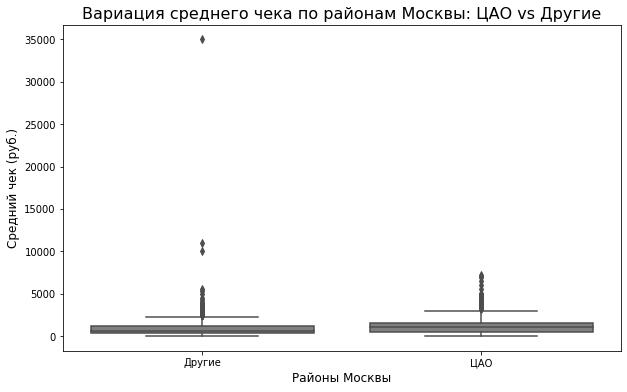

In [54]:
# Преобразуем данные по округам: выделим Центральный административный округ
df_filtered['is_cao'] = df_filtered['district'].apply(lambda x: 'ЦАО' if 'Центральный' in x else 'Другие')

# Преобразуем столбец middle_avg_bill в числовой формат
df_filtered['middle_avg_bill'] = pd.to_numeric(df_filtered['middle_avg_bill'], errors='coerce')

# Построим boxplot для визуализации распределения среднего чека по районам
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_cao', y='middle_avg_bill', data=df_filtered, color='grey')
plt.title('Вариация среднего чека по районам Москвы: ЦАО vs Другие', fontsize=16)
plt.xlabel('Районы Москвы', fontsize=12)
plt.ylabel('Средний чек (руб.)', fontsize=12)
plt.show()

На визуализации мы явно видим наличие выброса в районе 35000 руб., уберем его

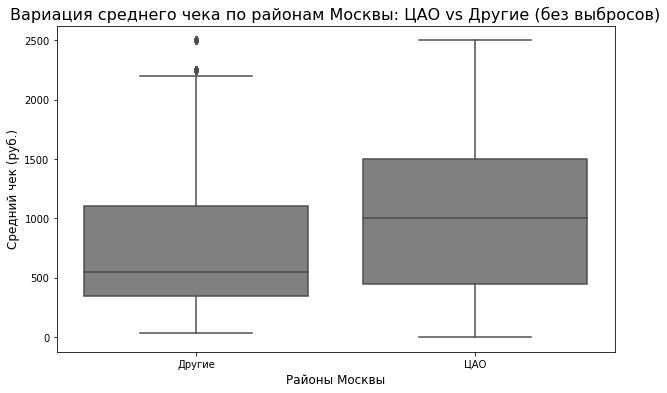

In [55]:
# Рассчитываем перцентили и IQR
Q1 = df_filtered['middle_avg_bill'].quantile(0.25)
Q3 = df_filtered['middle_avg_bill'].quantile(0.75)
IQR = Q3 - Q1

# Фильтруем данные, удаляя выбросы
df_filtered_no_outliers = df_filtered[(df_filtered['middle_avg_bill'] >= Q1 - 1.5 * IQR) & 
                                      (df_filtered['middle_avg_bill'] <= Q3 + 1.5 * IQR)]

# Построим boxplot для визуализации распределения среднего чека по районам без выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_cao', y='middle_avg_bill', data=df_filtered_no_outliers, color='grey')
plt.title('Вариация среднего чека по районам Москвы: ЦАО vs Другие (без выбросов)', fontsize=16)
plt.xlabel('Районы Москвы', fontsize=12)
plt.ylabel('Средний чек (руб.)', fontsize=12)
plt.show()

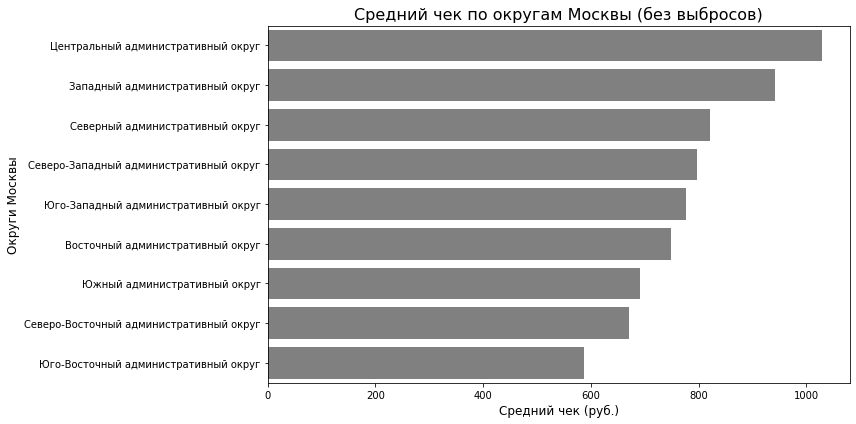

In [56]:
# Рассчитаем средний чек по всем округам с очищенными данными
avg_check_by_district = df_filtered_no_outliers.groupby('district')['middle_avg_bill'].mean().reset_index()

# Сортируем по среднему чеку
avg_check_by_district_sorted = avg_check_by_district.sort_values('middle_avg_bill', ascending=False)

# Построим столбчатую диаграмму с сортировкой
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_check_by_district_sorted, x='middle_avg_bill', y='district', color='grey', 
            order=avg_check_by_district_sorted['district'])
plt.title('Средний чек по округам Москвы (без выбросов)', fontsize=16)
plt.xlabel('Средний чек (руб.)', fontsize=12)
plt.ylabel('Округи Москвы', fontsize=12)
plt.tight_layout()
plt.show()

**На основе полученных данных и визуализаций можно сделать следующие выводы:**

- Средний чек в ЦАО выше, чем в других районах: график показывает, что средний чек заведений в Центральном административном округе значительно выше по сравнению с другими районами Москвы. Это подтверждает тенденцию, что близость к центру коррелирует с более высокими ценами.
- Широкая вариация среднего чека в ЦАО: мы видим, что в ЦАО наблюдается больше разброса значений среднего чека (есть заведения как с относительно низкими, так и с очень высокими средними чеками). Это может быть связано с разнообразием заведений, включая как элитные рестораны, так и бюджетные кафе. Для других районов разброс среднего чека менее выражен. Это может говорить о более стабильных ценах и меньшем количестве премиальных заведений по сравнению с ЦАО.
- Влияние удаленности от центра: Удаленность от центра явно влияет на снижение цен в заведениях. Это связано как с уровнем арендной платы, так и с покупательной способностью населения в разных районах Москвы.

Вывод: Удалённость от центра Москвы напрямую влияет на цены в заведениях. Чем ближе заведение к центру, тем выше цены и разнообразнее диапазон среднего чека. В удалённых районах цены ниже, а разброс менее выражен.

1. Категории заведений: анализ данных показал, что рынок общественного питания Москвы характеризуется доминированием кафе и ресторанов, а наименее популярными категориями являются булочные и столовые. 

2. Сетевое заведение или нет: большинство заведений несетевые, но среди булочных, кофейнь и пиццерий преобладают сетевые форматы. 

3. Средний чек: заведения в Центральном административном округе имеют более высокие средние чеки и широкий разброс цен, что отражает влияние близости к центру города.

4. Рейтинги: средние рейтинги варьируются незначительно между категориями, с наивысшими оценками у баров и пабов и самыми низкими — у заведений быстрого питания. Корреляция между рейтингом и изученными признаками оказалась слабой, что говорит о важности других факторов. Удаленность от центра и тип заведения играют важную роль в формировании цен, но на рейтинг их влияние минимально.

5. Популярные сети: среди популярных сетей лидируют кофейни, например, "Кофемания" с самым высоким рейтингом, несмотря на небольшое количество объектов. 

## 4. Детальное исследование пиццерий

Проведите более детальное исследование заведений типа «пиццерия».
Ответьте на следующие вопросы:

---

### Задача 1

Сколько всего пиццерий в датасете? В каких районах их больше всего? Вычислите долю пиццерий в каждом районе от общего количества заведений. Результат сопроводите подходящими визуализациями.

In [57]:
# Подсчитаем количество пиццерий
total_pizzerias = df_filtered[df_filtered['category'] == 'пиццерия'].shape[0]
print(f"Общее количество пиццерий в датасете: {total_pizzerias}")

# Посчитаем количество пиццерий в каждом районе
pizzerias_by_district = df_filtered[df_filtered['category'] == 'пиццерия'].groupby('district').size().reset_index(name='pizzeria_count')
display(pizzerias_by_district)

Общее количество пиццерий в датасете: 624


,district,pizzeria_count
0,Восточный административный округ,72
1,Западный административный округ,70
2,Северный административный округ,73
3,Северо-Восточный административный округ,68
4,Северо-Западный административный округ,40
5,Центральный административный округ,111
6,Юго-Восточный административный округ,55
7,Юго-Западный административный округ,64
8,Южный административный округ,71


In [58]:
# Посчитаем общее количество заведений по районам
total_restaurants_by_district = df_filtered.groupby('district').size().reset_index(name='total_count')

# Объединяем данные о пиццериях и общее количество заведений по районам
merged_data = pd.merge(pizzerias_by_district, total_restaurants_by_district, on='district', how='left')

# Добавляем столбец с долей пиццерий
merged_data['pizzeria_share'] = merged_data['pizzeria_count'] / merged_data['total_count']

# Посмотрим на результат
display(merged_data)

,district,pizzeria_count,total_count,pizzeria_share
0,Восточный административный округ,72,788,0.091371
1,Западный административный округ,70,824,0.084951
2,Северный административный округ,73,875,0.083429
3,Северо-Восточный административный округ,68,888,0.076577
4,Северо-Западный административный округ,40,409,0.097800
5,Центральный административный округ,111,2195,0.050569
6,Юго-Восточный административный округ,55,712,0.077247
7,Юго-Западный административный округ,64,704,0.090909
8,Южный административный округ,71,873,0.081329


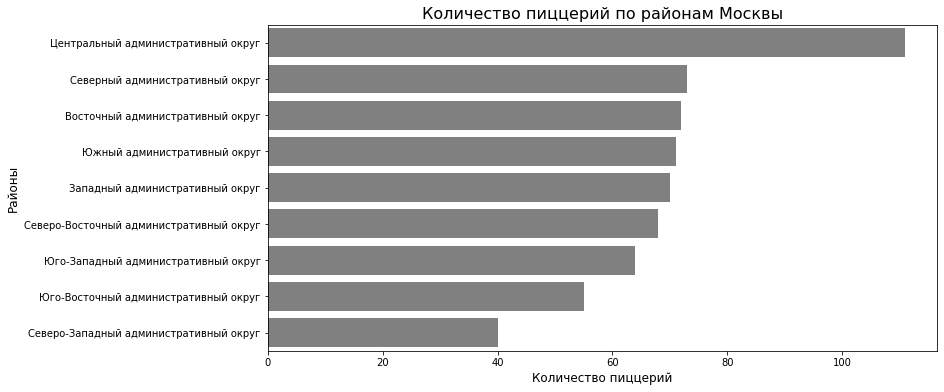

In [59]:
# Построим график для количества пиццерий по районам
sorted_districts = merged_data.sort_values('pizzeria_count', ascending=False)['district']
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='pizzeria_count', y='district', color='gray', order=sorted_districts)
plt.title('Количество пиццерий по районам Москвы', fontsize=16)
plt.xlabel('Количество пиццерий', fontsize=12)
plt.ylabel('Районы', fontsize=12)
plt.show()

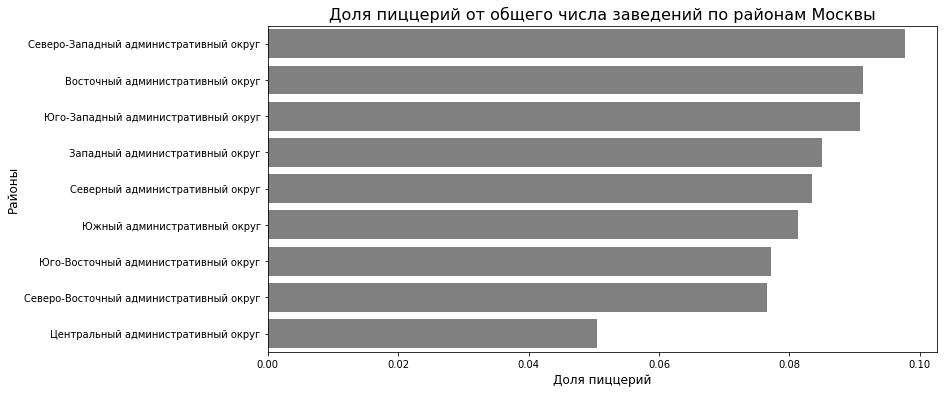

In [60]:
# Построим график для доли пиццерий по районам
sorted_districts = merged_data.sort_values('pizzeria_share', ascending=False)['district']
plt.figure(figsize=(12, 6))
sns.barplot(x='pizzeria_share', y='district', data=merged_data, color='gray', order=sorted_districts)
plt.title('Доля пиццерий от общего числа заведений по районам Москвы', fontsize=16)
plt.xlabel('Доля пиццерий', fontsize=12)
plt.ylabel('Районы', fontsize=12)
plt.show()

**На основе результатов можно сделать следующие выводы:**

1. Общее количество пиццерий в датасете: всего 586 пиццерий, это большое количество в разных районах Москвы.

2. Количество пиццерий в разных районах:
- Центральный административный округ (ЦАО) имеет наибольшее количество пиццерий — 81. Это объясняется высокой концентрацией заведений в центре города, где большее количество людей и активность.
- Северный административный округ (55 пиццерий) и Восточный административный округ (49 пиццерий) также имеют высокие значения, что говорит о развитой сети пиццерий в этих районах.
- Северо-Западный административный округ (24 пиццерии) имеет наименьшее количество пиццерий, что может указывать на менее развитую сеть ресторанов в этом районе или меньшую плотность населения.

3. Доля пиццерий от общего количества заведений:
- Центральный административный округ (ЦАО): несмотря на большое количество пиццерий (81), доля пиццерий от общего числа заведений в этом округе — 7.64%, что может свидетельствовать о высоком уровне конкуренции и разнообразии других типов заведений (например, кафе, рестораны и т.д.).
- Восточный административный округ: доля пиццерий здесь составляет 18.85%, что значительно выше, чем в ЦАО и может говорить о меньшей конкуренции в этом районе и о более высокой популярности пиццерий среди жителей.
- Западный административный округ: доля пиццерий — 13.73%, что также относительно высокая цифра по сравнению с ЦАО.
- Юго-Восточный административный округ имеет 12.89% доли пиццерий, что также свидетельствует о заметной популярности пиццерий в этом районе.
- Северо-Западный административный округ: несмотря на меньшее количество пиццерий (24), доля пиццерий от общего числа заведений составляет 15.29%, что выше средней доли в ЦАО, но все же ниже, чем в Восточном и Западном округах.

4. Общие выводы:
Центральные и южные районы города (например, ЦАО и Юго-Восточный округ) имеют менее высокую долю пиццерий, несмотря на большое количество заведений, что может свидетельствовать о высокой конкуренции и большем разнообразии типов заведений.
Восточные и северные районы, например, Восточный и Северный округа, имеют более высокую долю пиццерий от общего числа заведений, что может указывать на высокую популярность этого типа заведений среди местных жителей.

---

### Задача 2

Дайте характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений? Результат сопроводите подходящими визуализациями.

In [61]:
# Фильтруем данные для пиццерий
pizzerias_data = df_filtered[df_filtered['category'] == 'пиццерия'].copy()

# Среднее количество посадочных мест
avg_seats_pizzeria = pizzerias_data['seats'].mean()

# Преобразуем столбец 'middle_avg_bill' в числовой формат (с обработкой ошибок)
pizzerias_data['middle_avg_bill'] = pd.to_numeric(pizzerias_data['middle_avg_bill'], errors='coerce')

# Средний чек
avg_bill_pizzeria = pizzerias_data['middle_avg_bill'].mean()

# Преобразуем столбец 'middle_coffee_cup' в числовой формат (с обработкой ошибок)
pizzerias_data.loc[:, 'middle_coffee_cup'] = pd.to_numeric(pizzerias_data['middle_coffee_cup'], errors='coerce')

# Средняя стоимость чашки капучино (пропуски будут игнорироваться автоматически)
avg_coffee_price = pizzerias_data['middle_coffee_cup'].mean()

# Средний рейтинг
avg_rating_pizzeria = pizzerias_data['rating'].mean()

# Выводим результаты
print(f"Среднее количество посадочных мест: {avg_seats_pizzeria:.2f}")
print(f"Средний чек: {avg_bill_pizzeria:.2f} ₽")
print(f"Средняя стоимость чашки капучино: {avg_coffee_price:.2f} ₽")
print(f"Средний рейтинг: {avg_rating_pizzeria:.2f}")

Среднее количество посадочных мест: 23.25
Средний чек: 786.31 ₽
Средняя стоимость чашки капучино: 153.33 ₽
Средний рейтинг: 4.30


**Типичная пиццерия выглядит следующим образом:**
- среднее количество посадочных мест составляет около 42 мест
- средний чек на одного клиента в пиццерии составляет примерно 782 руб
- стоимость чашки капучино составляет в среднем 153 руб, но на эти данные опираться нельзя, т.к. изначально у нас есть только 7,5% заполненной информации в данном столбце, остальную часть составляют неизвестные (пропущенные) данные
- средний рейтинг пиццерии составляет 4,30 (высокий рейтинг, что может свидетельствовать о хорошем уровне обслуживания и качества)

Таким образом, типичная пиццерия обладает достаточно комфортной вместимостью, умеренным средним чеком и достойной ценой за чашку кофе, при этом она имеет положительный рейтинг.

In [62]:
# Доля сетевых заведений
networked_data = df[df['chain'] == 1]
network_share = networked_data.shape[0] / df.shape[0]
not_networked_data = df[df['chain'] == 0]
not_network_share = not_networked_data.shape[0] / df.shape[0]

# Выводим результаты
print(network_share)
print(not_network_share)

0.38127527956221746
0.6187247204377825


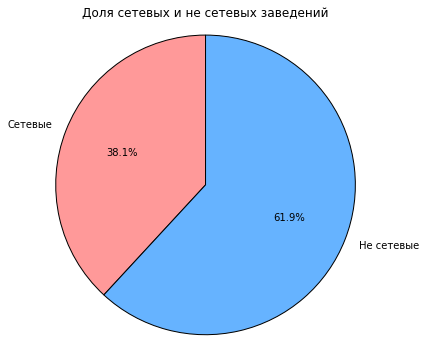

In [63]:
# Подготовим данные для круговой диаграммы
labels = ['Сетевые', 'Не сетевые']
sizes = [network_share, not_network_share]
colors = ['#ff9999', '#66b3ff']

# Построим круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Доля сетевых и не сетевых заведений')
plt.axis('equal')
plt.show()

Большее количество пиццерий - несетевые (61%), доля сетевых заведений подобного типа составляет 38%

In [64]:
# Фильтруем данные для пиццерий
pizzerias_data = df[df['category'] == 'пиццерия']

# Фильтруем круглосуточные пиццерии
round_the_clock_pizzerias = pizzerias_data[pizzerias_data['hours'].str.contains('круглосуточно', case=False, na=False)]

# Вычисляем долю круглосуточных пиццерий от общего числа пиццерий
round_the_clock_share = round_the_clock_pizzerias.shape[0] / pizzerias_data.shape[0]

# Количество круглосуточных и не круглосуточных пиццерий
round_the_clock_count = round_the_clock_pizzerias.shape[0]
non_round_the_clock_count = pizzerias_data.shape[0] - round_the_clock_count

# Выводим результат
print(round_the_clock_share)
print(round_the_clock_count)
print(non_round_the_clock_count)

0.05055292259083728
32
601


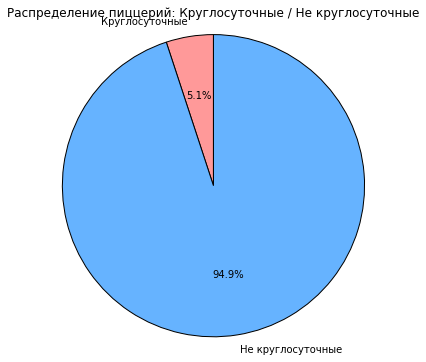

In [65]:
# Данные для круговой диаграммы
labels = ['Круглосуточные', 'Не круглосуточные']
sizes = [round_the_clock_count, non_round_the_clock_count]
colors = ['#ff9999', '#66b3ff']

# Построим круговую диаграмму
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Распределение пиццерий: Круглосуточные / Не круглосуточные')
plt.axis('equal')
plt.show()

**Из полученных результатов можно сделать следующие выводы:**

- Доля круглосуточных пиццерий: результат указывает, что лишь примерно 5% всех пиццерий работают круглосуточно
- Количество круглосуточных пиццерий: весь набор данных содержит 633 пиццерии, из которых 32 работают круглосуточно
- Количество не круглосуточных пиццерий: 601 пиццерия не работает круглосуточно, что составляет основную массу пиццерий

- Возможные выводы: низкая доля круглосуточных пиццерий может быть связана с операционными затратами или с особенностями потребностей местных жителей.

Вывод - При открытии новой пиццерии круглосуточного формата стоит учесть, что рынок таких заведениц достаточно небольшой, необходимо тщательно оценить затраты и потребности.

**В категории пиццерия более 90% заведений работают не 24/7**

---

### Задача 3

Изучите распределение сетевых и несетевых пиццерий в зависимости от округа Москвы. В каких округах меньше всего сетевых пиццерий? Результат сопроводите подходящими визуализациями.

In [66]:
# Фильтруем данные только для категории "пиццерия"
pizzeria_df = df[df['category'] == 'пиццерия']

# Группируем данные по округу и типу заведения (сетевое или не сетевое)
district_chain_summary = pizzeria_df.groupby(['district', 'chain']).size().unstack(fill_value=0)
district_chain_summary.columns = ['Несетевые', 'Сетевые']

# Добавляем столбец с долей сетевых пиццерий
district_chain_summary['Доля сетевых'] = district_chain_summary['Сетевые'] / (district_chain_summary['Сетевые'] + district_chain_summary['Несетевые'])

# Проверяем результат
display(district_chain_summary[['Несетевые', 'Сетевые', 'Доля сетевых']])

,Несетевые,Сетевые,Доля сетевых
district,,,
Восточный административный округ,34,38,0.527778
Западный административный округ,33,38,0.535211
Северный административный округ,37,40,0.519481
Северо-Восточный административный округ,32,36,0.529412
Северо-Западный административный округ,18,22,0.550000
Центральный административный округ,65,48,0.424779
Юго-Восточный административный округ,26,29,0.527273
Юго-Западный административный округ,26,38,0.593750
Южный административный округ,32,41,0.561644


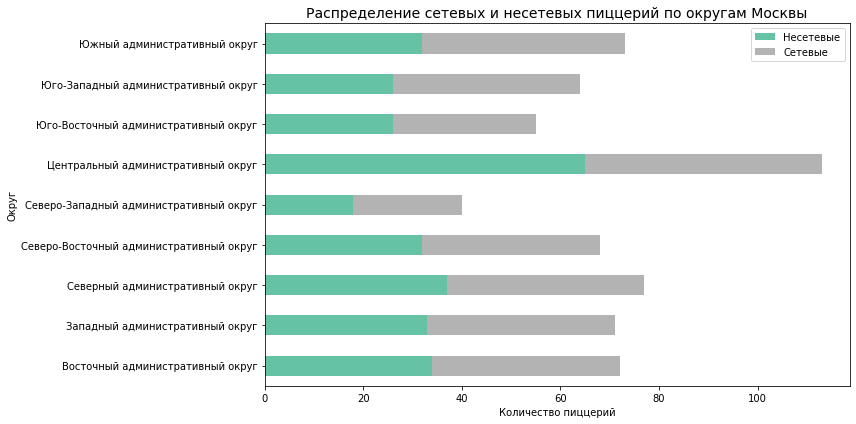

In [67]:
#Столбчатая диаграмма с распределением сетевых и несетевых пиццерий по округам
district_chain_summary[['Несетевые', 'Сетевые']].plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Распределение сетевых и несетевых пиццерий по округам Москвы", fontsize=14)
plt.xlabel("Количество пиццерий")
plt.ylabel("Округ")
plt.legend(["Несетевые", "Сетевые"])
plt.tight_layout()
plt.show()

**На основе полученных данных можно сделать выводы:**

1. Распределение сетевых и несетевых пиццерий:
- В Центральном административном округе (ЦАО) наибольшее количество пиццерий среди всех округов, однако доля сетевых пиццерий ниже (42.5%), что говорит о преобладании несетевых заведений в центре Москвы.
- В Северо-Западном административном округе меньше всего сетевых пиццерий (22) при общем небольшом числе пиццерий (40), однако их доля относительно высока (50%).
- Северный, Восточный и Южный округа демонстрируют относительно равномерное распределение между сетевыми и несетевыми заведениями с долей сетевых около 52-56%.

2. Округа с наименьшим числом сетевых пиццерий:
- Северо-Западный административный округ — всего 22 сетевых пиццерии
- Юго-Восточный административный округ — 29 сетевых пиццерий
- Юго-Западный административный округ — 38 сетевых пиццерий

3. Доли сетевых пиццерий: самая высокая доля сетевых пиццерий наблюдается в Юго-Западном (59.4%) и Южном округах (56.2%), что может указывать на более активное развитие сетевых заведений в этих районах. Центральный округ (ЦАО) имеет самую низкую долю сетевых пиццерий (42.5%), несмотря на наибольшее абсолютное количество заведений.

**Общий вывод:**
Сетевые пиццерии более распространены в Южном и Юго-Западном округах Москвы, где их доля превышает 55%. Меньше всего сетевых пиццерий в Северо-Западном округе (всего 22 заведения), а также в Центральном округе, где преобладают несетевые заведения, несмотря на высокое общее количество пиццерий.

---

### Промежуточный вывод

Попробуйте дать рекомендацию для открытия нового заведения. Это творческое задание: здесь нет правильного или неправильного ответа, но ваше решение должно быть чем-то обосновано. Например, можно сделать акцент на районах или улицах. Или дать характеристику типичной пиццерии.

Для открытия нового заведения, особенно пиццерии, важно учесть несколько факторов, чтобы выбрать подходящее место с высокой вероятностью успеха. Можно выделить несколько ключевых рекомендаций:

1. Выбор района с высокой долей пиццерий
В исследовании отмечены районы с высокими долями пиццерий среди других типов заведений. Это может свидетельствовать о большой популярности пиццерий среди местных жителей и высокого спроса на этот тип бизнеса. Рекомендуемые районы:
- Восточный административный округ (доля пиццерий — 18.85%): высокий интерес и спрос на пиццу в этом районе. Открытие пиццерии здесь будет иметь хорошие шансы на успех, поскольку конкуренция среди пиццерий, вероятно, меньше, чем в более центральных районах.
- Западный и Юго-Восточный административные округа (доля пиццерий — 13.73% и 12.89%, соответственно): в этих районах может быть менее высокая конкуренция, но при этом стабильный спрос на пиццу.
- Центральный административный округ (ЦАО): в данном районе достаточно высокая конкуренция, но можно открыть заведение с уникальным предложением или более высокой концепцией, этот район может быть подходящим, так как в центре города всегда есть высокий поток людей.

2. Рассмотрение плотности сетевых пиццерий
- В Северо-Западном округе наблюдается наименьшее количество сетевых пиццерий, что открывает возможности для создания несетевого заведения. Вы можете предложить уникальное меню, ориентированное на местных жителей, что сделает заведение более привлекательным для определенной аудитории.

3. Учет рабочего времени (круглосуточно)
- круглосуточное заведение будет актуально для более оживленных и туристических районов, таких как ЦАО, где множество людей и ночная жизнь активна.

4. Целевая аудитория и локальная культура
- Исходя из характеристик, пиццерии имеют среднее количество посадочных мест — около 42, что делает их подходящими для создания комфортной атмосферы для различных групп людей: семьи, друзья, студенты и офисные работники. Средний чек в 782 рубля и стоимость чашки капучино в 153 рубля делают заведения доступными для широкой аудитории, что стоит учитывать при выборе локации. Более дорогие районы, как ЦАО, могут быть хорошими для более премиум-форматов, но для большинства аудиторий предпочтительнее заведения с более доступными ценами, особенно в районах с высокой плотностью студентов или молодых людей, таких как Восточный и Западный округа.

**Рекомендации по открытию нового заведения:**

Восточный административный округ — высокая доля пиццерий и меньшая конкуренция. Это будет хорошее место для открытия нового заведения с уникальной концепцией, например, ресторан с акцентом на качественные ингредиенты или экзотические виды пиццы.

Центральный административный округ (ЦАО) — открытие заведения с особенной концепцией и возможностью предлагать круглосуточное обслуживание. Здесь конкуренция выше, но высокая проходимость гарантирует, что заведение будет востребовано.

Северо-Западный административный округ — для создания уникального несетевого заведения с ориентацией на местных жителей, с возможностью завоевать внимание через высокое качество и особенность пиццы.

## 5. Итоговый вывод и рекомендации

В ходе исследования проанализировали заведения общественного питания в Москве с целью открытия нового завдения.
Данные были доступны из датасета с заведениями общественного питания Москвы, составленного на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

### Общие выводы по всем заведениям

1. **Категории заведений:** В данных представлены 8 уникальных категорий заведений общественного питания: кафе и рестораны составляют основную часть объектов общественного питания в данных, в то время как менее популярными являются булочные и столовые.
 
2. **Локация:** Наибольшее количество заведений расположено в Центральном административном округе Москвы (2242 заведения), меньше всего заведений представлено в Северо-Западном административном округе (409 заведений). В ЦАО наибольшее количество заведений представляют рестораны, меньше всего заведений в категориях столовая, пиццерия и булочная.

3. **Режим работы:** Круглосуточно работают лишь около 17,6% заведений, заведения с ограниченным временем работы (не круглосуточные) составляют подавляющее большинство (около 82%). Но хотя заведений, работающих круглосуточно, меньше, их количество мест также существенно меньше по сравнению с заведениями с ограниченным временем работы.

4. **Рейтинги заведений:** наиболее высоко оцениваются бары и пабы, за ними следуют пиццерии и рестораны.

5. **Сеть или нет:** несетевые заведения составляют большую часть рынка (62%) общественного питания. Однако булочные, кофейни и пиццерии чаще представлены в сетевых форматах. 

6. **Количество посадочных мест:** в ресторанах и барах большее количество посадочных мест (82-86), в то время как заведения быстрого питания и булочные имеют меньшие типичные значения (50-65).

7. **Средний чек:** удалённость от центра Москвы напрямую влияет на цены в заведениях. Чем ближе заведение к центру, тем выше цены и разнообразнее диапазон среднего чека. В удалённых районах цены ниже, а разброс менее выражен

8. **Популярность заведений:** кофейни наиболее распространены среди сетевых заведений и имеют относительно высокие средние рейтинги. Сети из категорий пиццерий и ресторанов, также, занимают значительное место.

### Общие выводы по категории "пиццерия"

1. **Локация:** Центральные и южные районы города (например, ЦАО и Юго-Восточный округ) имеют менее высокую долю пиццерий (7-12%), несмотря на большое количество заведений, что может свидетельствовать о высокой конкуренции и большем разнообразии типов заведений. Восточные и северные районы, например, Восточный и Северный округа, имеют более высокую долю пиццерий (15-19%) от общего числа заведений, что может указывать на высокую популярность этого типа заведений среди местных жителей.

2. **Режим работы:** более 90% пиццерий работают не круглосуточно, это означает, что из 633 пиццерий только 32 пиццерии работают круглосуточно.

3. **Сеть или нет:** центральные и более крупные округа Москвы (например, Центральный и Восточный) имеют высокую концентрацию сетевых пиццерий, в то время как в некоторых менее густонаселенных или удаленных округах (например, Северо-Западный) меньше сетевых пиццерий (22), а количество несетевых более значительное (18).


### Рекомендации

Для открытия нового заведения можно сделать акцент на нескольких аспектах: выбор района для открытия заведения, анализ спроса и конкуренции, выбор формата заведения, а также режим работы заведения. 

**Вот несколько ключевых рекомендаций:**

1. Локация
Рекомендуется открыть пиццерию в Восточном или Северном округе, где доля пиццерий больше (15-18%), что свидетельствует о высоком спросе. Однако, если ориентироваться на более центральное расположение, стоит рассматривать ЦАО, но с учётом высокой конкуренции, для успешной работы здесь необходимо предложить уникальное меню или особый концепт заведения (например, круглосуточная пиццерия или пицца с эксклюзивными ингредиентами)

2. Формат заведения
Для открытия сетевой пиццерии, целесообразно ориентироваться на ЦАО и Восточный округ, где уже развито это направление. 
Для несетевого заведения лучше рассматривать районы с меньшей конкуренцией, такие как Северо-Западный округ.

3. Режим работы
Для открытия пиццерии можно выбрать круглосуточный режим работы в ЦАО, Юго-Восточном округе или других районах с высокой проходимостью и потребностью в ночных заведениях. В остальных случаях, для уменьшения расходов на персонал и ночные смены, стоит выбирать заведение с ограниченным временем работы.

4. Рекомендации по концепции заведения
Для сетевого формата: открытие пиццерии в ЦАО или Восточном округе может быть успешным, если предложить стандартное меню с привлекательными ценами, но с акцентом на качество.
Для несетевого формата: в Северо-Западном округе или в менее густонаселённых районах можно создать пиццерию с уникальной концепцией, например, с экзотическими ингредиентами, необычным интерьером или с фокусом на здоровое питание. Это может привлечь местных жителей, ищущих уникальные гастрономические впечатления.

5. Рекомендации по ценовой политике и среднему чеку
В Центральных и более дорогих районах (например, ЦАО) следует устанавливать чуть более высокие цены, с учётом более высоких арендных ставок и потребности в разнообразии меню. Для районов с более низким доходом (например, Северо-Западный округ) стоит предложить более доступные варианты, чтобы привлечь местных жителей.